In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the JSON file line by line
file_path = '/Users/kevhhu/Downloads/yelp_dataset/yelp_academic_dataset_business.json'
data = []
with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Convert the list of dictionaries to a DataFrame
business_df = pd.DataFrame(data)

# Normalize city names and categories for comparison
business_df['city'] = business_df['city'].str.strip().str.lower()
business_df['categories'] = business_df['categories'].str.strip().str.lower()

# Filter for pizza places based on category keywords
pizza_keywords = ["pizza", "italian", "pizzeria"]

def contains_pizza_keywords(categories):
    if categories is None:
        return False
    return any(keyword in categories for keyword in pizza_keywords)

pizza_businesses = business_df[
    business_df['categories'].apply(contains_pizza_keywords)
]

# Display relevant columns
pizza_businesses = pizza_businesses[['business_id', 'name', 'address', 'city', 'state', 'categories', 'stars', 'review_count']]
print("Filtered pizza businesses:")
print(pizza_businesses.head())


Filtered pizza businesses:
               business_id                     name             address  \
8   k0hlBqXX-Bt0vf1op7Jr1w    Tsevi's Pub And Grill   8025 Mackenzie Rd   
14  0bPLkL0QhhPO5kt1_EXmNQ     Zio's Italian Market       2575 E Bay Dr   
23  9OG5YkX1g2GReZM0AskizA  Romano's Macaroni Grill  5505 S Virginia St   
28  QdN72BWoyFypdGJhhI5r7g                  Bar One        767 S 9th St   
29  sqSqqLy0sN8n2IZrAbzidQ           Domino's Pizza   3001 Highway 31 W   

            city state                                         categories  \
8         affton    MO  pubs, restaurants, italian, bars, american (tr...   
14         largo    FL        food, delis, italian, bakeries, restaurants   
23          reno    NV                               restaurants, italian   
28  philadelphia    PA  cocktail bars, bars, italian, nightlife, resta...   
29   white house    TN      pizza, chicken wings, sandwiches, restaurants   

    stars  review_count  
8     3.0            19  
14    4

In [3]:
# Load the Yelp review data
review_file_path = '/Users/kevhhu/Downloads/yelp_dataset/yelp_academic_dataset_review.json'
with open(review_file_path, 'r') as file:
    review_data = [json.loads(line) for line in file]
review_df = pd.DataFrame(review_data)

# Merge review data with filtered pizza businesses
merged_df = pd.merge(review_df, pizza_businesses, on='business_id', how='inner')

# Check the columns in the merged DataFrame
print("Columns in merged_df:", merged_df.columns)


Columns in merged_df: Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'categories', 'stars_y', 'review_count'],
      dtype='object')


In [4]:
# Enhanced function to check for payment-related keywords with a higher character count
def check_payment_mentions(text):
    keywords = [
        "online payment", "pay on delivery", "pay on pickup", "pay in store", "prepaid", 
        "cash on delivery", "credit card payment", "mobile payment", "pay with card", 
        "pay with cash", "contactless payment"
    ]
    return any(keyword in text.lower() for keyword in keywords)

# Add a column to identify reviews mentioning payment preferences
merged_df['payment_mention'] = merged_df['text'].apply(check_payment_mentions)

# Filter reviews that mention payment preferences
payment_reviews = merged_df[merged_df['payment_mention']]

print("Sample of payment-related reviews:")
print(payment_reviews[['text', 'stars_x']].head())


Sample of payment-related reviews:
                                                    text  stars_x
9619   Food is always really good - it's Chicago clas...      2.0
9818   I preferred to call my credit card company rat...      1.0
10885  This place is so cozy and comfortable! I love ...      5.0
19052  After previously having nothing but awesome se...      1.0
19692  Decent food but service not good at all. Waite...      2.0


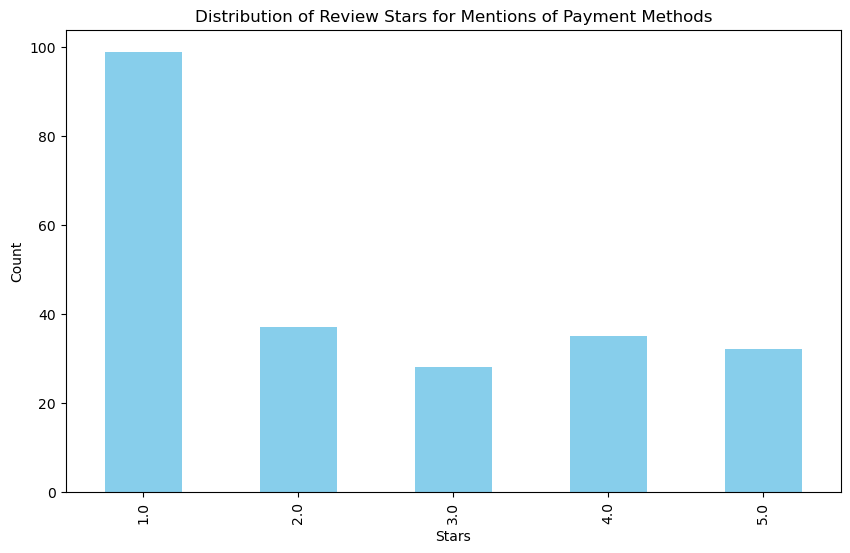

In [6]:
# Plot the distribution of stars for reviews mentioning payment
plt.figure(figsize=(10, 6))
payment_reviews['stars_x'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Review Stars for Mentions of Payment Methods')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()




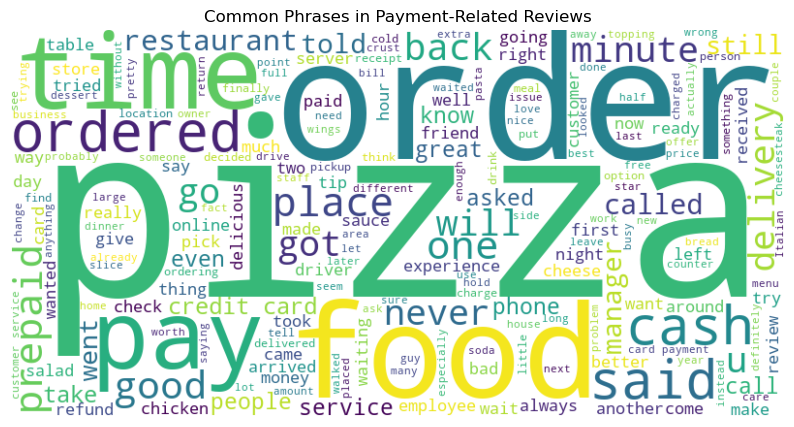

In [7]:
# Generate a word cloud of payment-related reviews
payment_text = ' '.join(payment_reviews['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(payment_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Phrases in Payment-Related Reviews')
plt.show()